In [1]:
from _ROTOR import rotor 
from _MISSION_PLANNER import MissionPlanner
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# x = rotor()
# x.set_rotor(5,0.5,3,0.8,0,twist0=np.deg2rad(5),twist_slope=0,omega=30)
# lambdas,v,sigma,twist, thrust ,dT,Fs,d_torque, torque = x.bemt(V=5)


In [8]:
import numpy as np
# Create rotor instance
x = rotor()
radius=  5
root_cut_out = 0.8
chord_root = 0.3
chord_tip = 0.1
# Set more realistic rotor parameters
x.set_rotor(
    radius=radius,        # m
    root_cut_out=root_cut_out,  # m
    chord0=chord_root,       
    chord_slope= (chord_tip - chord_root)/(radius-root_cut_out),
    blades=3,
    omega=23,           # rad/s (~238 RPM)
    twist0= np.deg2rad(0),
    twist_slope= np.deg2rad(3)/(radius-root_cut_out)
)
x.atmosphere(h=2000)

(275.15, 94218.07928359076, 1.154950429497074, 332.5274883374305)

In [9]:
# Forward flight conditions
forward_speed = 55.55  # m/s
alpha_tpp = np.deg2rad(3)

theta0 = np.deg2rad(8)
theta1c = np.deg2rad(0)
theta1s = np.deg2rad(0)

# Compute forces and flapping angles
forces_moments, R_grid, PSI_grid, alpha, dT, dH, dY = x.forward(
    forward_speed=forward_speed,
    theta0=theta0,
    theta1c=theta1c,
    theta1s=theta1s,
    alpha_tpp=alpha_tpp
)

# Print relevant outputs
print("FZ (Thrust) [N]:", forces_moments['FZ'])
print("FX (Forward) [N]:", forces_moments['FX'])
print("FY (Lateral) [N]:", forces_moments['FY'])
print("beta0 [rad]:", forces_moments['beta0'])
print("beta1c [rad]:", forces_moments['beta1c'])
print("beta1s [rad]:", forces_moments['beta1s'])
print("CT (Rotor Thrust Coefficient):", forces_moments.get('CT', 'Not computed'))

FZ (Thrust) [N]: 61321.43508014134
FX (Forward) [N]: 80361.9235145067
FY (Lateral) [N]: 5697.23386960235
beta0 [rad]: 0.017453292519943295
beta1c [rad]: -0.01348911860150052
beta1s [rad]: -0.01348911860150052
CT (Rotor Thrust Coefficient): 0.017038923318091276


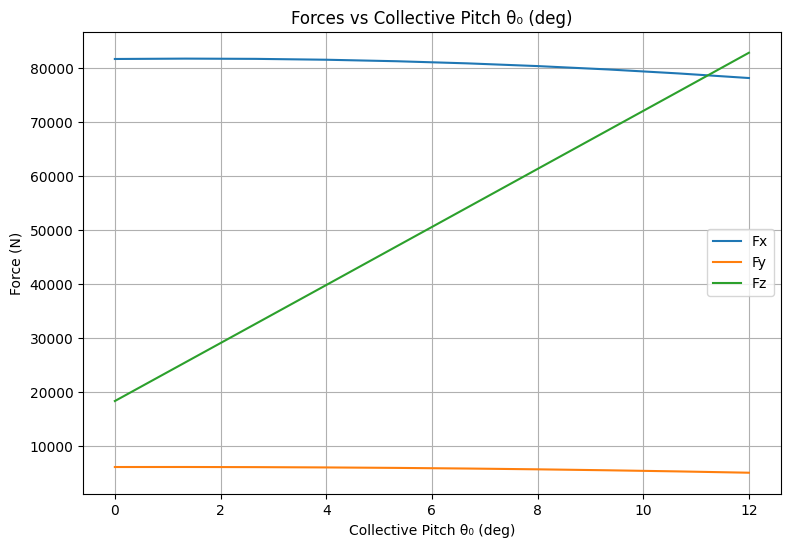

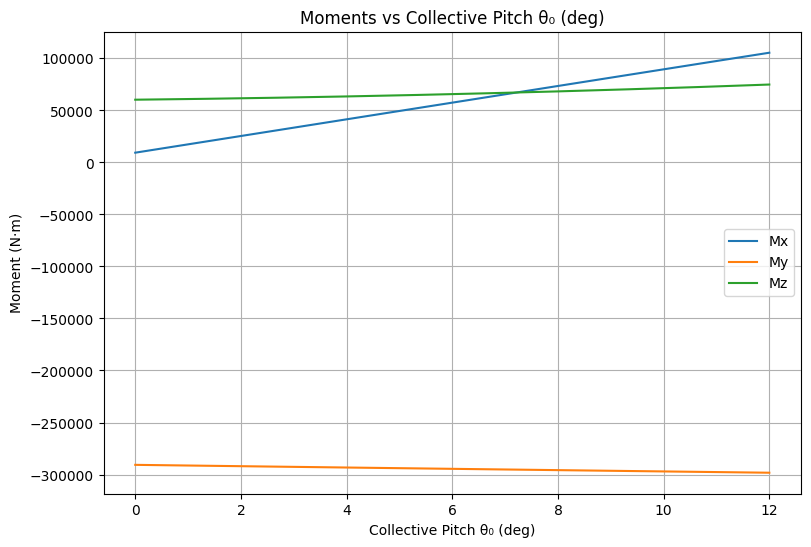

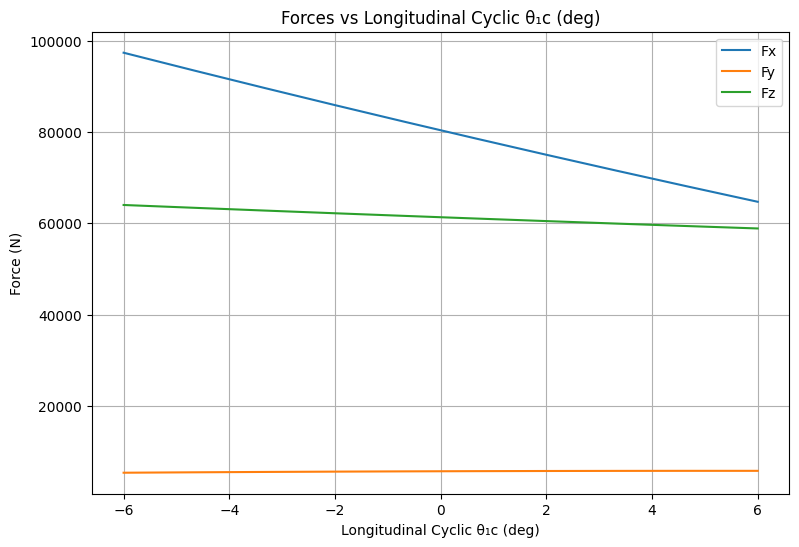

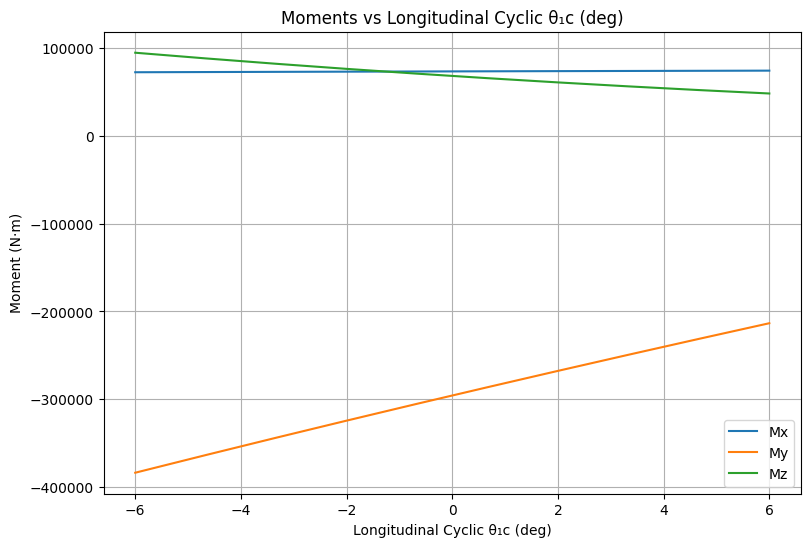

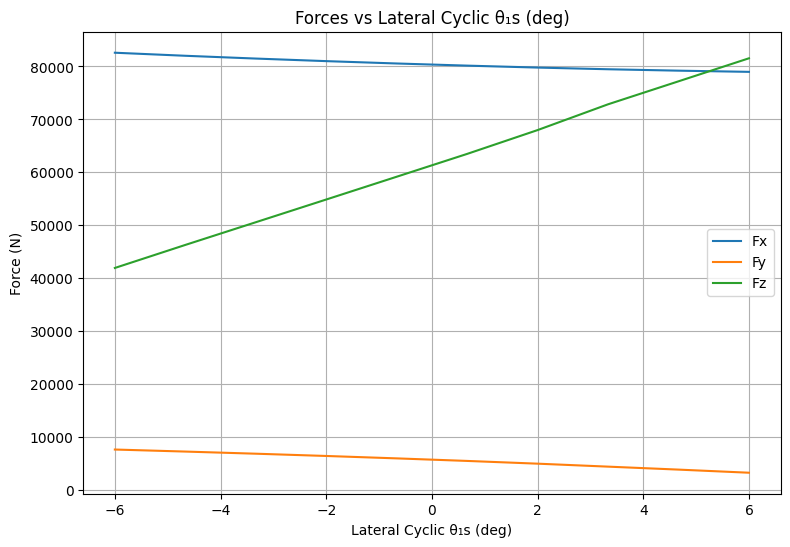

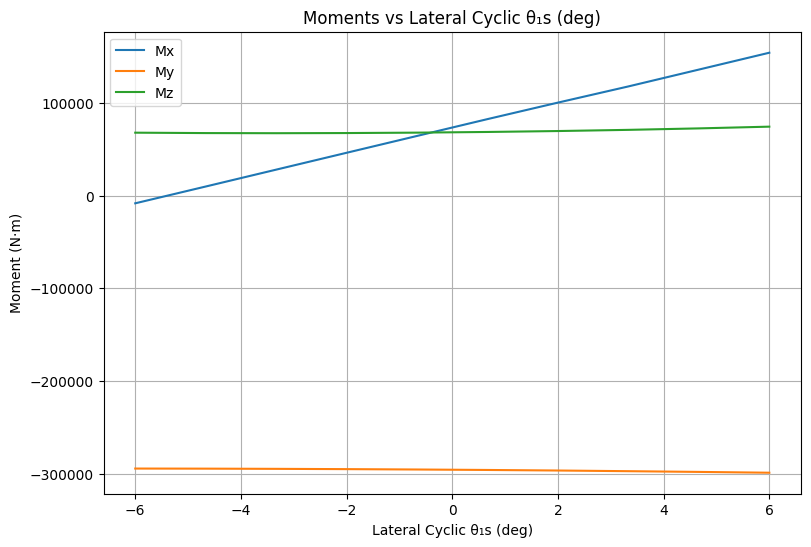

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Fixed forward-flight condition ---
forward_speed = 55.55  # m/s
alpha_tpp = np.deg2rad(3)

# Define input ranges (in degrees)
collective_range = np.linspace(0, 12, 10)   # θ0 (collective)
cyclic_lat_range = np.linspace(-6, 6, 10)   # θ1c (longitudinal cyclic)
cyclic_lon_range = np.linspace(-6, 6, 10)   # θ1s (lateral cyclic)

# Helper function to run a sweep
def sweep_input(x, var_name, var_range, theta0_fixed, theta1c_fixed, theta1s_fixed):
    Fx, Fy, Fz, Mx, My, Mz = [], [], [], [], [], []
    for val_deg in var_range:
        theta0 = np.deg2rad(theta0_fixed)
        theta1c = np.deg2rad(theta1c_fixed)
        theta1s = np.deg2rad(theta1s_fixed)
        if var_name == "theta0":
            theta0 = np.deg2rad(val_deg)
        elif var_name == "theta1c":
            theta1c = np.deg2rad(val_deg)
        elif var_name == "theta1s":
            theta1s = np.deg2rad(val_deg)

        forces_moments, *_ = x.forward(
            forward_speed=forward_speed,
            theta0=theta0,
            theta1c=theta1c,
            theta1s=theta1s,
            alpha_tpp=alpha_tpp
        )

        Fx.append(forces_moments['FX'])
        Fy.append(forces_moments['FY'])
        Fz.append(forces_moments['FZ'])
        Mx.append(forces_moments['MX'])
        My.append(forces_moments['MY'])
        Mz.append(forces_moments['MZ'])
    return Fx, Fy, Fz, Mx, My, Mz

# --- Sweep 1: Collective pitch θ0 ---
Fx0, Fy0, Fz0, Mx0, My0, Mz0 = sweep_input(
    x, "theta0", collective_range, theta0_fixed=0, theta1c_fixed=0, theta1s_fixed=0
)

# --- Sweep 2: Longitudinal cyclic θ1c ---
Fx1c, Fy1c, Fz1c, Mx1c, My1c, Mz1c = sweep_input(
    x, "theta1c", cyclic_lat_range, theta0_fixed=8, theta1c_fixed=0, theta1s_fixed=0
)

# --- Sweep 3: Lateral cyclic θ1s ---
Fx1s, Fy1s, Fz1s, Mx1s, My1s, Mz1s = sweep_input(
    x, "theta1s", cyclic_lon_range, theta0_fixed=8, theta1c_fixed=0, theta1s_fixed=0
)

# -------------------- PLOTTING --------------------

def plot_forces(var_range, Fx, Fy, Fz, xlabel):
    plt.figure(figsize=(9,6))
    plt.plot(var_range, Fx, label='Fx')
    plt.plot(var_range, Fy, label='Fy')
    plt.plot(var_range, Fz, label='Fz')
    plt.xlabel(xlabel)
    plt.ylabel('Force (N)')
    plt.title(f'Forces vs {xlabel}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_moments(var_range, Mx, My, Mz, xlabel):
    plt.figure(figsize=(9,6))
    plt.plot(var_range, Mx, label='Mx')
    plt.plot(var_range, My, label='My')
    plt.plot(var_range, Mz, label='Mz')
    plt.xlabel(xlabel)
    plt.ylabel('Moment (N·m)')
    plt.title(f'Moments vs {xlabel}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for θ0
plot_forces(collective_range, Fx0, Fy0, Fz0, 'Collective Pitch θ₀ (deg)')
plot_moments(collective_range, Mx0, My0, Mz0, 'Collective Pitch θ₀ (deg)')

# Plot for θ1c
plot_forces(cyclic_lat_range, Fx1c, Fy1c, Fz1c, 'Longitudinal Cyclic θ₁c (deg)')
plot_moments(cyclic_lat_range, Mx1c, My1c, Mz1c, 'Longitudinal Cyclic θ₁c (deg)')

# Plot for θ1s
plot_forces(cyclic_lon_range, Fx1s, Fy1s, Fz1s, 'Lateral Cyclic θ₁s (deg)')
plot_moments(cyclic_lon_range, Mx1s, My1s, Mz1s, 'Lateral Cyclic θ₁s (deg)')
